In [77]:
import pandas as pd
import seaborn as sns

In [107]:
df=pd.read_csv('~/Downloads/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [108]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.describe()

In [ ]:
df.info()

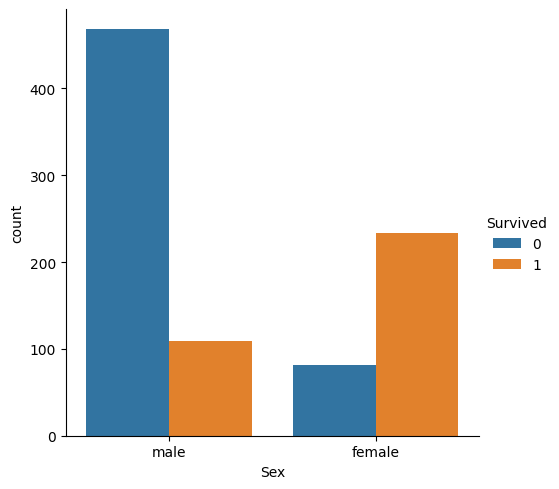

In [52]:
sns.catplot(x='Sex',hue='Survived',data=df,kind='count');

In [45]:
df.groupby('Sex')['Survived'].aggregate(lambda x:x.sum()/len(x))

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [54]:
data=df.groupby(['Survived','Pclass']).size().unstack()
print(data)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


<Axes: xlabel='Pclass', ylabel='Survived'>

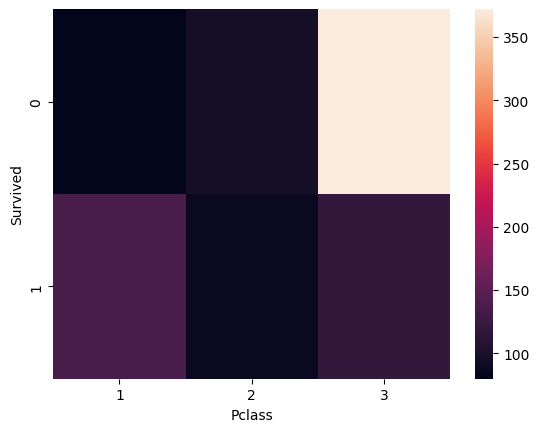

In [56]:
sns.heatmap(data)

<Axes: xlabel='Pclass', ylabel='Survived'>

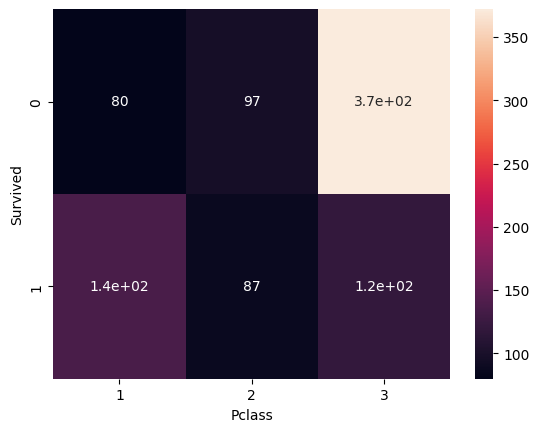

In [58]:
sns.heatmap(data,annot=True)

<Axes: xlabel='Pclass', ylabel='Survived'>

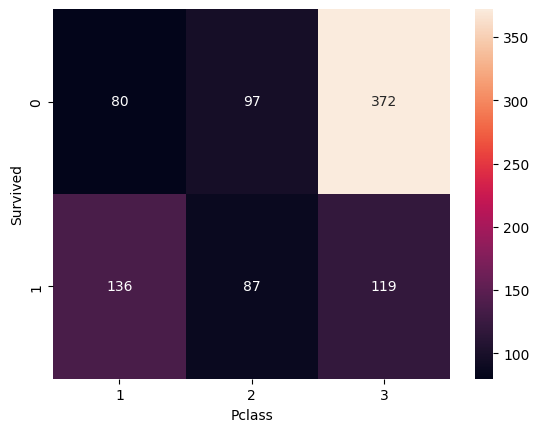

In [59]:
sns.heatmap(data,annot=True,fmt='d')

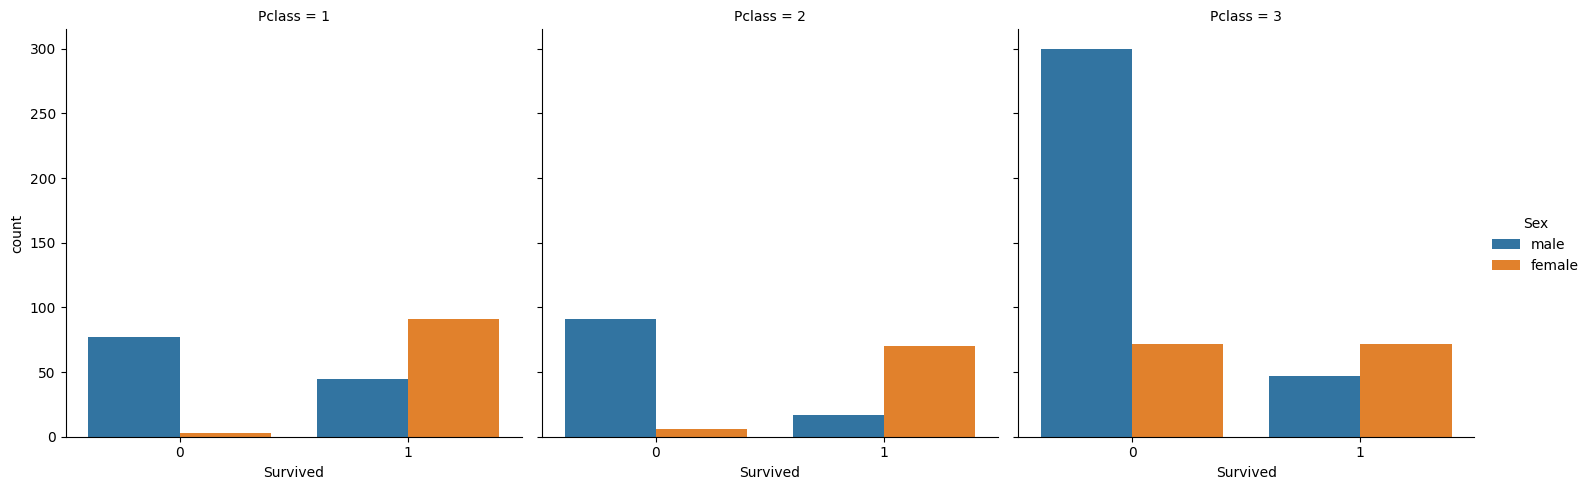

In [60]:
sns.catplot(x='Survived',hue='Sex',col='Pclass',data=df,kind='count')

In [67]:

df=df.ffill()
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [ ]:
df=df.ffill()

In [93]:
df.ffill()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,19.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [109]:

df.bfill()
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [110]:
df=df.drop(columns=['Name','Ticket','Cabin','PassengerId'])

In [111]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])


In [112]:
target=df['Survived']
df.drop(columns=['Survived'])

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,NaN,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [115]:
df['Age']=df['Age'].fillna(0)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,target,test_size=0.25)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
848         0       2    1  28.0      0      1  33.0000         2
541         0       3    0   9.0      4      2  31.2750         2
243         0       3    1  22.0      0      0   7.1250         2
261         1       3    1   3.0      4      2  31.3875         2
53          1       2    0  29.0      1      0  26.0000         2
..        ...     ...  ...   ...    ...    ...      ...       ...
593         0       3    0   0.0      0      2   7.7500         1
157         0       3    1  30.0      0      0   8.0500         2
10          1       3    0   4.0      1      1  16.7000         2
676         0       3    1  24.5      0      0   8.0500         2
677         1       3    0  18.0      0      0   9.8417         2

[223 rows x 8 columns]
82     1
97     1
12     0
72     0
810    0
      ..
203  

In [116]:
from sklearn import svm

s=svm.SVC().fit(x_train,y_train)
s_predicted=s.predict(x_test)

In [120]:
from sklearn import metrics
print(metrics.classification_report(y_test,s_predicted))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       149
           1       0.59      0.31      0.41        74

    accuracy                           0.70       223
   macro avg       0.66      0.60      0.60       223
weighted avg       0.68      0.70      0.67       223



In [122]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier().fit(x_train,y_train)
dt_predicted=dt.predict(x_test)

In [123]:
print(metrics.classification_report(y_test,dt_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00        74

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



In [124]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor().fit(x_train,y_train)
rf_predicted=rf.predict(x_test)

In [125]:

from sklearn.metrics import mean_squared_error
# ارزیابی مدل
print("Mean Squared Error:", mean_squared_error(y_test, rf_predicted))

Mean Squared Error: 0.0
